### M1M3 LUT Iterative Improvement Results Notebook

Relevant imports

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from astropy.time import Time, TimeDelta
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from lsst_efd_client import EfdClient
from lsst.ts.cRIOpy import M1M3FATable
from lsst.sitcom import vandv

Example code of how to plot fields in different EFD topics.

In [2]:
client = EfdClient('summit_efd')

In [ ]:
async def get_balance_forces(start, end, resample_rate='1T'):
    # Retrieve elevations
    elevations = await client.select_time_series(
        'lsst.sal.MTMount.elevation',
        ['actualPosition', 'timestamp'],  
        start, 
        end,
    )  
    elevations = elevations['actualPosition'].resample('1T').mean()

    forces_z = await client.select_time_series(
        "lsst.sal.MTM1M3.appliedBalanceForces", 
        zForce, 
        start,
        end
    )

    forces_y = await client.select_time_series(
        "lsst.sal.MTM1M3.appliedBalanceForces", 
        yForce, 
        start,
        end
    )

    # join dataframes and resample them.
    forces = pd.concat([forces_y.dropna(axis = 1), forces_z.dropna(axis = 1)])
    forces = forces.resample('1T').mean()
    
    return forces, elevations

async def get_hardpoint_forces(start, end, resample_rate='1T'):
    # Retrieve elevations
    elevations = await client.select_time_series(
        'lsst.sal.MTMount.elevation',
        ['actualPosition', 'timestamp'],  
        start, 
        end,
    )  
    elevations = elevations['actualPosition'].resample('1T').mean()

    forces = await client.select_time_series(
        "lsst.sal.MTM1M3.hardpointActuatorData", 
        ['fx', 'fy', 'fz', 'mx', 'my', 'mz'], 
        start,
        end
    )
    
    forces = forces.resample('1T').mean()
    
    return forces, elevations

async def get_hardpoint_forces_in(start, end, resample_rate='1T'):
    # Retrieve elevations
    elevations = await client.select_time_series(
        'lsst.sal.MTMount.elevation',
        ['actualPosition', 'timestamp'],  
        start, 
        end,
    )  
    elevations = elevations['actualPosition'].resample('1T').mean()

    forces = await client.select_time_series(
        "lsst.sal.MTM1M3.hardpointActuatorData", 
        ['measuredForce0', 'measuredForce1', 'measuredForce2', 'measuredForce3', 'measuredForce4','measuredForce5'], 
        start,
        end
    )
    
    forces = forces.resample('1T').mean()
    
    return forces, elevations

Set start and end time of the sequence that we want to analyze

Create ids vector

In [4]:
fat = np.array(M1M3FATable.FATABLE, dtype=object)
ids = fat[:, M1M3FATable.FATABLE_ID]

xForce = [str("".join(("xForces",str(i)))) for i in range(12)]
yForce = [str("".join(("yForces",str(i)))) for i in range(100)]
zForce = [str("".join(("zForces",str(i)))) for i in range(156)]

### Plot balance forces

In [8]:
start = Time('2023-05-31 08:35:0Z', scale='utc')
end = Time('2023-05-31 09:40:0Z', scale='utc')

forces_it0, elevations_it0 = await get_balance_forces(start, end)

In [9]:
start = Time('2023-06-16 02:30:0Z', scale='utc')
end = Time('2023-06-16 03:01:0Z', scale='utc')

forces_it1, elevations_it1 = await get_balance_forces(start, end)

In [10]:
start = Time('2023-06-21 05:35:0Z', scale='utc')
end = Time('2023-06-21 06:26:0Z', scale='utc')

forces_it2, elevations_it2 = await get_balance_forces(start, end)

In [11]:
start = Time('2023-06-22 02:20:0Z', scale='utc')
end = Time('2023-06-22 03:45:0Z', scale='utc')

forces_it3, elevations_it3 = await get_balance_forces(start, end)

In [12]:
start = Time('2023-06-22 21:38:0Z', scale='utc')
end = Time('2023-06-22 23:16:0Z', scale='utc')

forces_it4, elevations_it4 = await get_balance_forces(start, end)

In [13]:
start = Time('2023-06-24 02:13:0Z', scale='utc')
end = Time('2023-06-24 03:01:0Z', scale='utc')

forces_it5, elevations_it5 = await get_balance_forces(start, end)

In [14]:
start = Time('2023-06-27 01:35:0Z', scale='utc')
end = Time('2023-06-27 02:43:5Z', scale='utc')

forces_it6, elevations_it6 = await get_balance_forces(start, end)

In [15]:
start = Time('2023-06-27 11:45:0Z', scale='utc')
end = Time('2023-06-27 12:12:0Z', scale='utc')

forces_it7, elevations_it7 = await get_balance_forces(start, end)

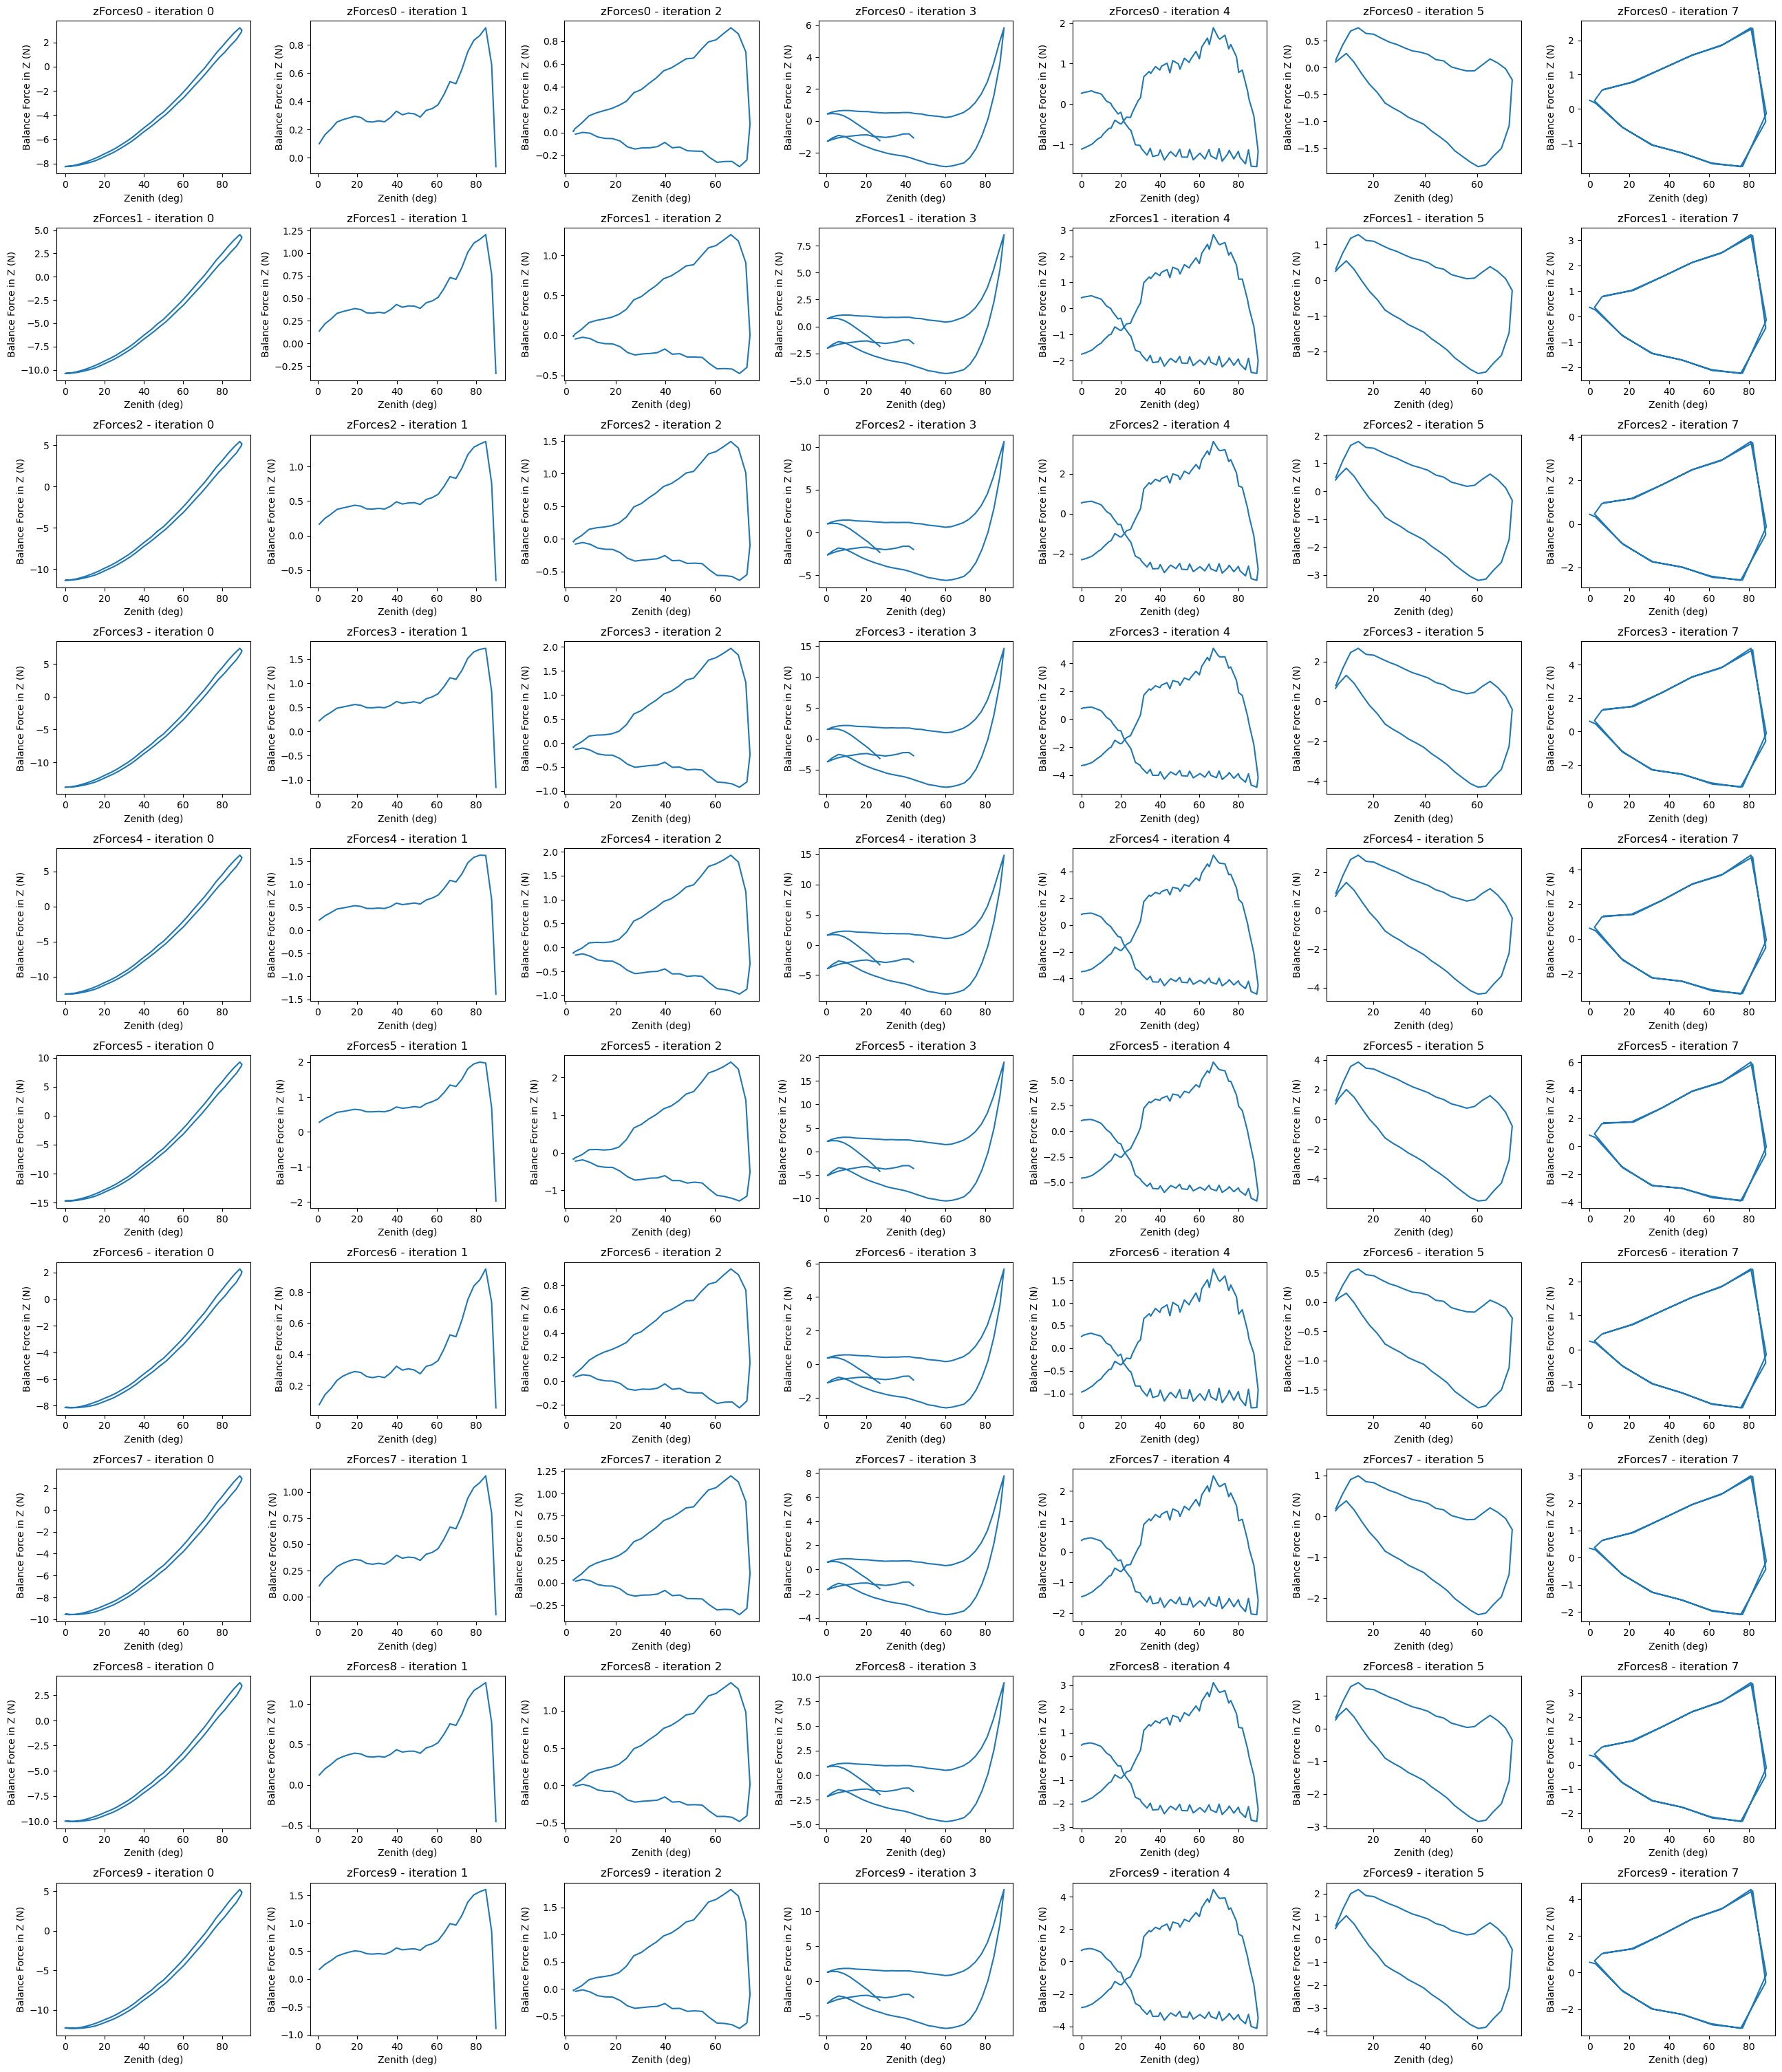

In [16]:
fig = plt.figure(figsize = (26,120))
for idx in range(10):
    plt.subplot(40,7,7*idx + 1)
    plt.plot(90 - elevations_it0, forces_it0[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 0')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(40,7,7*idx + 2)
    plt.plot(90 - elevations_it1, forces_it1[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 1')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(40,7,7*idx + 3)
    plt.plot(90 - elevations_it2, forces_it2[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 2')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(40,7,7*idx + 4)
    plt.plot(90 - elevations_it3, forces_it3[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 3')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(40,7,7*idx + 5)
    plt.plot(90 - elevations_it4, forces_it4[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 4')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(40,7,7*idx + 6)
    plt.plot(90 - elevations_it5, forces_it5[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 5')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(40,7,7*idx + 7)
    plt.plot(90 - elevations_it7, forces_it7[zForce[idx]], '-', label = 'Balance forces')
    plt.title(f'{zForce[idx]} - iteration 7')
    plt.ylabel('Balance Force in Z (N)')
    plt.xlabel('Zenith (deg)')
    
plt.tight_layout()

### Plot total measured forces

In [6]:
start = Time('2023-05-29 23:16:0Z', scale='utc')
end = Time('2023-05-29 23:47:0Z', scale='utc')

forces_hp_it0, elevations_hp_it0 = await get_hardpoint_forces(start, end)
forces_hp_in_it0, elevations_hp_in_it0 = await get_hardpoint_forces_in(start, end)

In [7]:
start = Time('2023-06-16 03:13:0Z', scale='utc')
end = Time('2023-06-16 03:49:0Z', scale='utc')

forces_hp_it1, elevations_hp_it1 = await get_hardpoint_forces(start, end)
forces_hp_in_it1, elevations_hp_in_it1 = await get_hardpoint_forces_in(start, end)

In [8]:
start = Time('2023-06-22 04:08:0Z', scale='utc')
end = Time('2023-06-22 04:49:0Z', scale='utc')

forces_hp_it3, elevations_hp_it3 = await get_hardpoint_forces(start, end)
forces_hp_in_it3, elevations_hp_in_it3 = await get_hardpoint_forces_in(start, end)

In [9]:
start = Time('2023-06-27 00:13:0Z', scale='utc')
end = Time('2023-06-27 01:22:5Z', scale='utc')

forces_hp_it6, elevations_hp_it6 = await get_hardpoint_forces(start, end)
forces_hp_in_it6, elevations_hp_in_it6 = await get_hardpoint_forces_in(start, end)

In [10]:
start = Time('2023-06-27 08:06:0Z', scale='utc')
end = Time('2023-06-27 08:40:0Z', scale='utc')

forces_hp_it7, elevations_hp_it7 = await get_hardpoint_forces(start, end)
forces_hp_in_it7, elevations_hp_in_it7 = await get_hardpoint_forces_in(start, end)

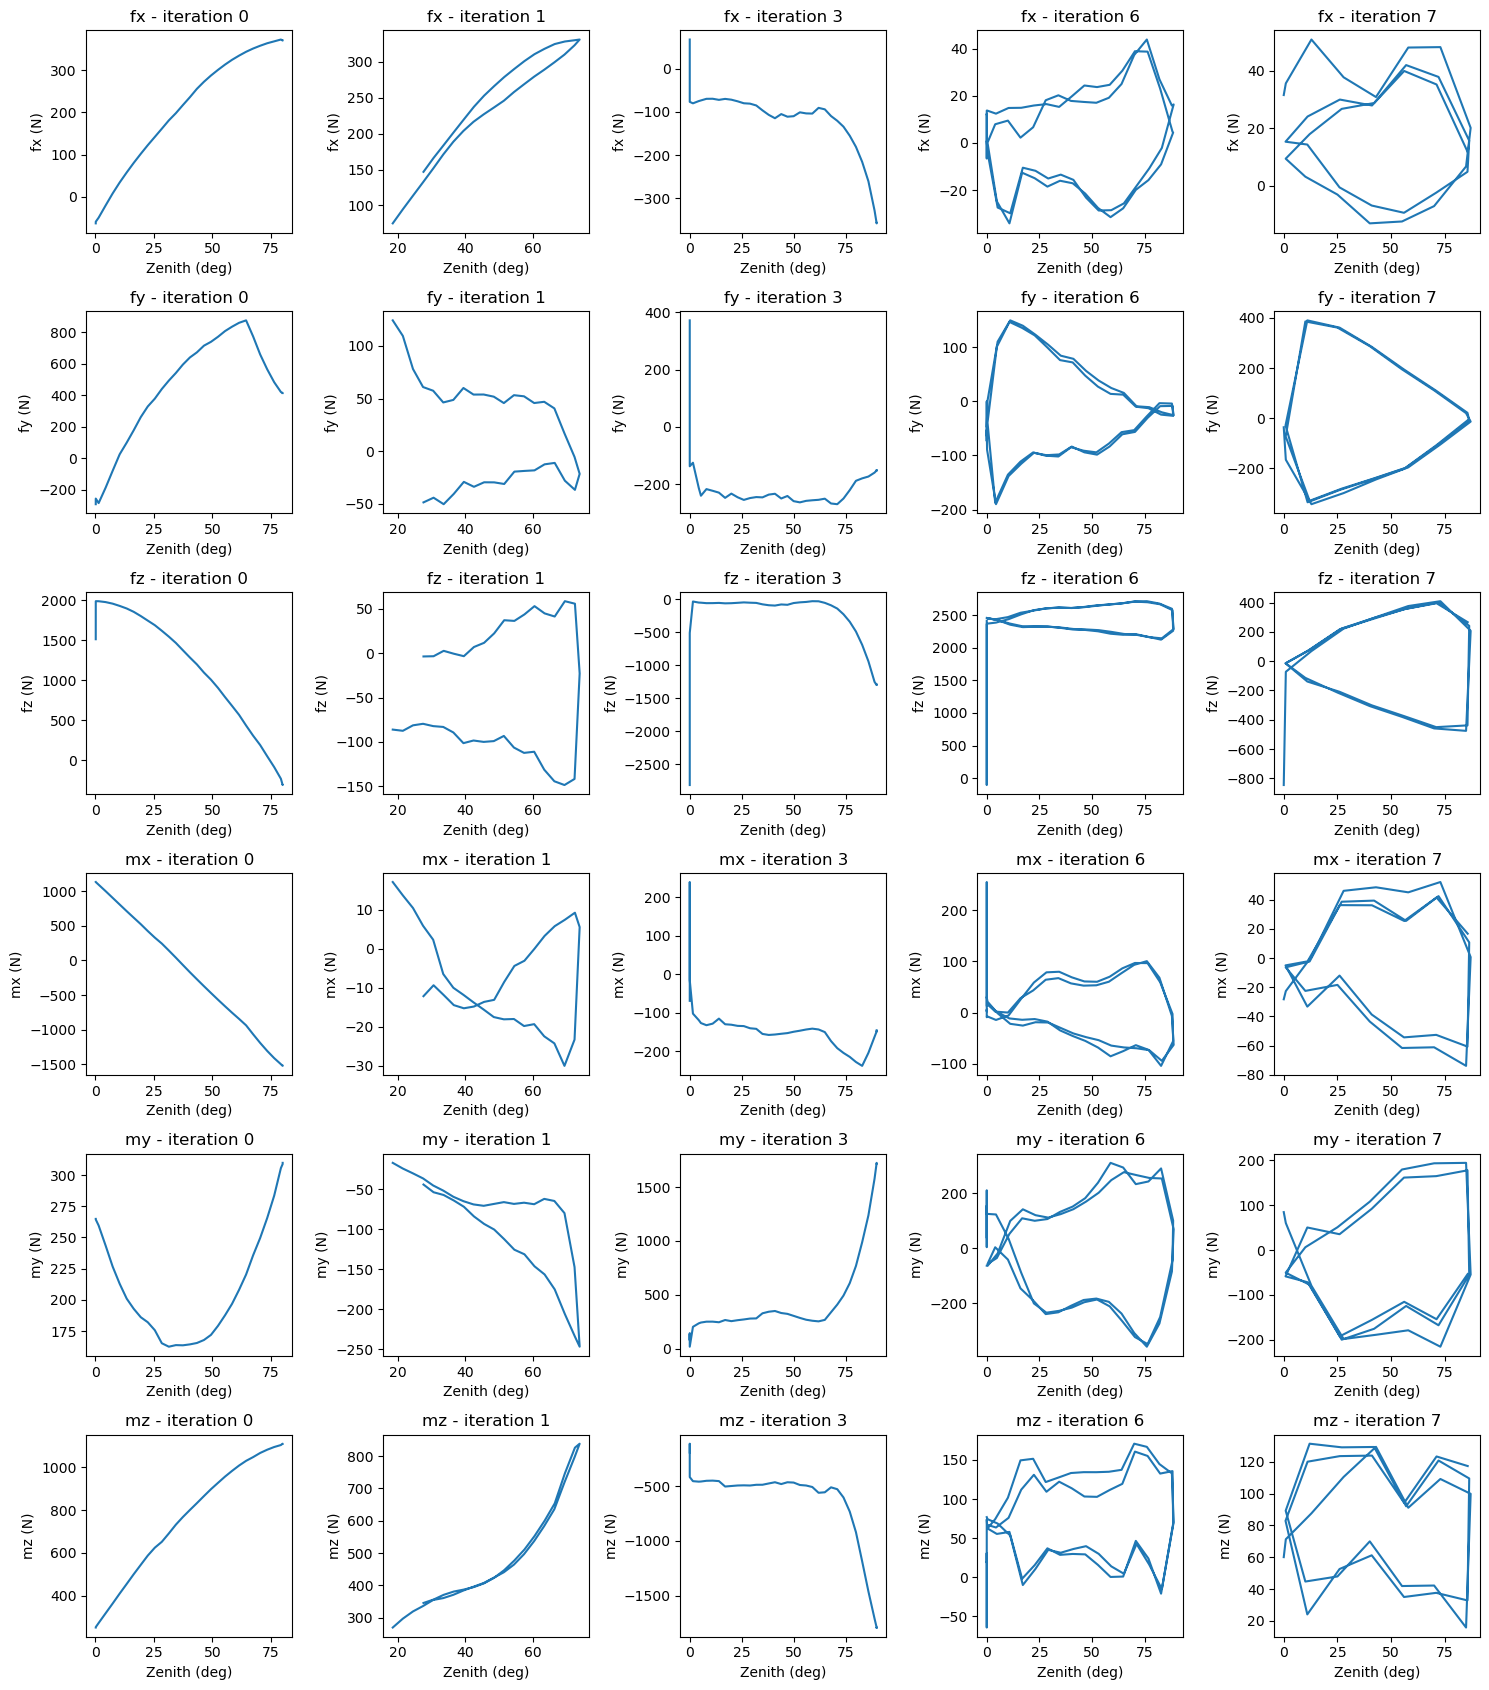

In [11]:
hpForces = ['fx', 'fy', 'fz', 'mx', 'my', 'mz']
fig = plt.figure(figsize = (15,17))
for idx in range(6):
    plt.subplot(6,5,5*idx + 1)
    plt.plot(90 - elevations_hp_it0, forces_hp_it0[hpForces[idx]], '-', label = 'Balance forces')
    plt.title(f'{hpForces[idx]} - iteration 0')
    plt.ylabel(f'{hpForces[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 2)
    plt.plot(90 - elevations_hp_it1, forces_hp_it1[hpForces[idx]], '-', label = 'Balance forces')
    plt.title(f'{hpForces[idx]} - iteration 1')
    plt.ylabel(f'{hpForces[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 3)
    plt.plot(90 - elevations_hp_it3, forces_hp_it3[hpForces[idx]], '-', label = 'Balance forces')
    plt.title(f'{hpForces[idx]} - iteration 3')
    plt.ylabel(f'{hpForces[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 4)
    plt.plot(90 - elevations_hp_it6, forces_hp_it6[hpForces[idx]], '-', label = 'Balance forces')
    plt.title(f'{hpForces[idx]} - iteration 6')
    plt.ylabel(f'{hpForces[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 5)
    plt.plot(90 - elevations_hp_it7, forces_hp_it7[hpForces[idx]], '-', label = 'Balance forces')
    plt.title(f'{hpForces[idx]} - iteration 7')
    plt.ylabel(f'{hpForces[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
plt.tight_layout()
plt.savefig('Evolution_hardpoint_forces.png')

### Plot total hardpoint forces

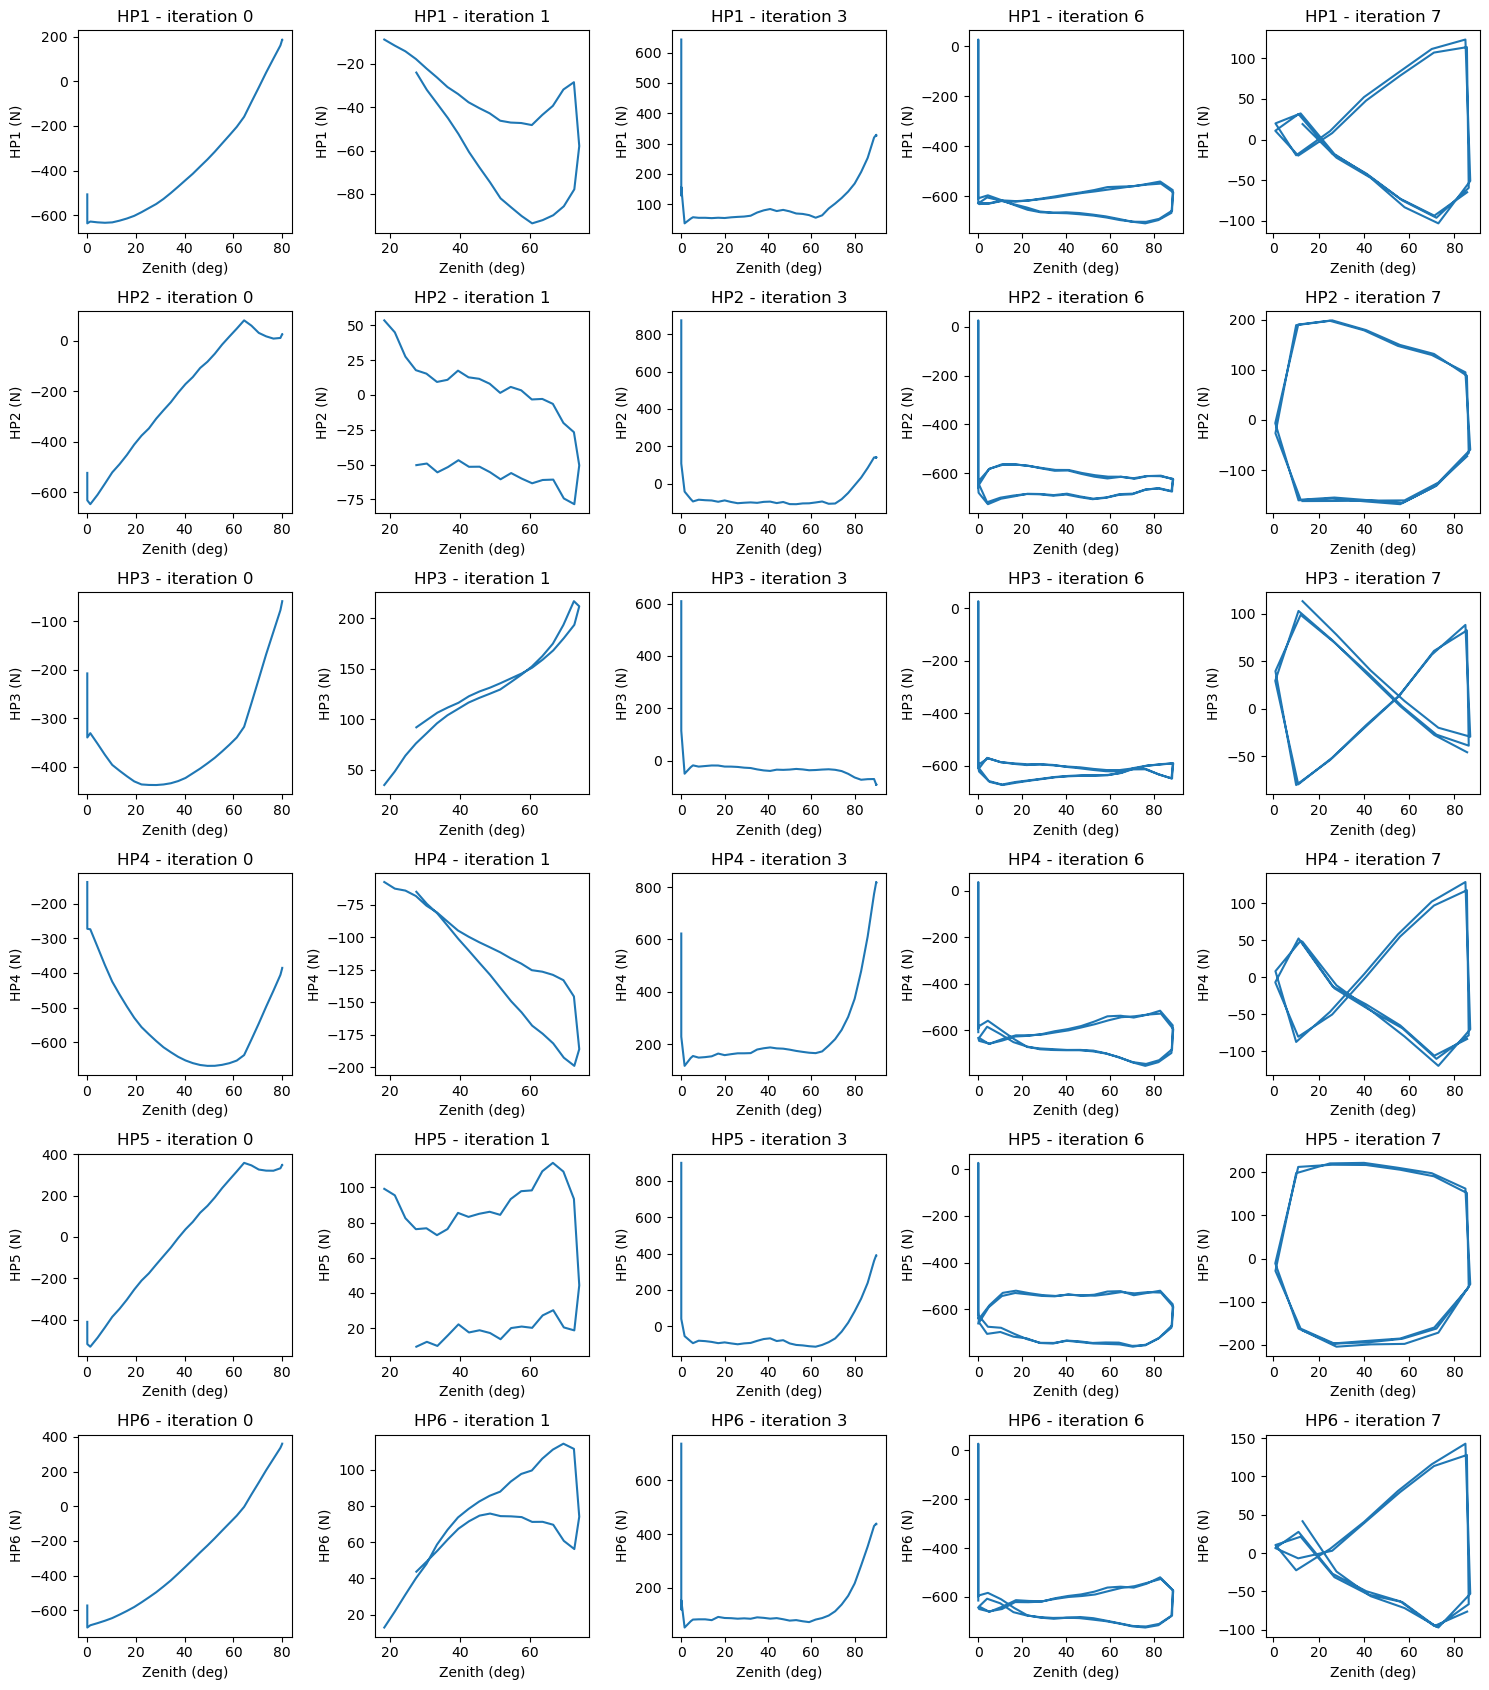

In [12]:
hps = ['HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HP6']
hpsm = ['measuredForce0', 'measuredForce1', 'measuredForce2', 'measuredForce3', 'measuredForce4','measuredForce5']

fig = plt.figure(figsize = (15,17))
for idx in range(6):
    plt.subplot(6,5,5*idx + 1)
    plt.plot(90 - elevations_hp_in_it0, forces_hp_in_it0[hpsm[idx]], '-', label = 'Balance forces')
    plt.title(f'{hps[idx]} - iteration 0')
    plt.ylabel(f'{hps[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 2)
    plt.plot(90 - elevations_hp_in_it1, forces_hp_in_it1[hpsm[idx]], '-', label = 'Balance forces')
    plt.title(f'{hps[idx]} - iteration 1')
    plt.ylabel(f'{hps[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 3)
    plt.plot(90 - elevations_hp_in_it3, forces_hp_in_it3[hpsm[idx]], '-', label = 'Balance forces')
    plt.title(f'{hps[idx]} - iteration 3')
    plt.ylabel(f'{hps[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 4)
    plt.plot(90 - elevations_hp_in_it6, forces_hp_in_it6[hpsm[idx]], '-', label = 'Balance forces')
    plt.title(f'{hps[idx]} - iteration 6')
    plt.ylabel(f'{hps[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
    plt.subplot(6,5,5*idx + 5)
    plt.plot(90 - elevations_hp_in_it7[2:], forces_hp_in_it7[hpsm[idx]][2:], '-', label = 'Balance forces')
    plt.title(f'{hps[idx]} - iteration 7')
    plt.ylabel(f'{hps[idx]} (N)')
    plt.xlabel('Zenith (deg)')
    
plt.tight_layout()
plt.savefig('Evolution_hardpoint_forces_in.png')

### Plot specific iteration

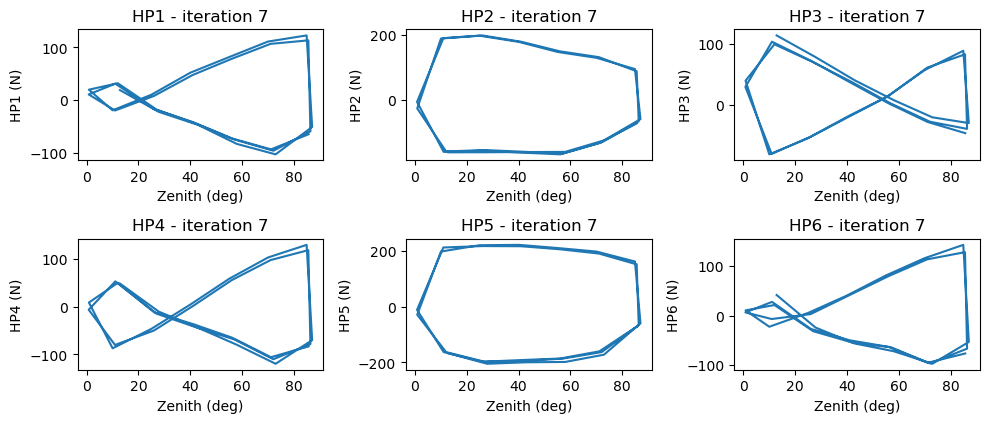

In [20]:
hps = ['HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HP6']
hpsm = ['measuredForce0', 'measuredForce1', 'measuredForce2', 'measuredForce3', 'measuredForce4','measuredForce5']

fig = plt.figure(figsize = (10,6))
for idx in range(6):
    plt.subplot(3,3,idx + 1)
    plt.plot(90 - elevations_hp_in_it7[2:], forces_hp_in_it7[hpsm[idx]][2:], '-', label = 'Balance forces')
    plt.title(f'{hps[idx]} - iteration 7')
    plt.ylabel(f'{hps[idx]} (N)')
    plt.xlabel('Zenith (deg)')

    
plt.tight_layout()
plt.savefig('Evolution_hardpoint_forces_in.png')